In [1]:
# generate photometry from spectral time series
!head sn2011fe_1a.v3.2.dat

In [2]:
import numpy as np
data = np.genfromtxt('sn2011fe_1a.v3.2.dat')
phase = np.unique(data[:, 0])
wave = np.unique(data[:, 1])
flux = data[:, 2].reshape(phase.shape + wave.shape)

In [6]:
import sncosmo
source = sncosmo.TimeSeriesSource(phase, wave, flux)

In [7]:
source

In [11]:
model = sncosmo.Model(source=source)
model.set(z=0.0008042637717626894, t0=55813.9)

In [12]:
print model

source:
  class      : TimeSeriesSource
  name       : None
  version    : None
  phases     : [-13, .., 41] days
  wavelengths: [1750, .., 24900] Angstroms
parameters:
  z         = 0.00080426377176268939
  t0        = 55813.900000000001
  amplitude = 1.0


In [72]:
bands = ['cspu', 'cspb', 'cspv3014', 'cspg', 'cspr',
         'cspi', 'cspys', 'cspjs', 'csphs', 'cspk']
tmin = model.get('t0') - 15.
tmax = model.get('t0') + 40.
tgrid = np.random.random((30 * len(bands))) * (tmax - tmin) + tmin
bgrid = [np.random.choice(bands) for i in range(len(tgrid))]
zp = [25.] * len(bgrid)
zpsys = ['csp'] * len(bgrid)
skynoise = [0.] * len(bgrid)
gain = [1.] * len(bgrid)

In [73]:
from astropy.table import Table

In [74]:
table = Table({'time':tgrid,
               'band':bgrid,
               'gain':gain,
               'skynoise':skynoise,
               'zp':zp,
               'zpsys':zpsys})

In [75]:
table

skynoise,zpsys,band,gain,time,zp
float64,str3,str8,float64,float64,float64
0.0,csp,cspk,1.0,55826.028895,25.0
0.0,csp,cspys,1.0,55838.7129319,25.0
0.0,csp,cspb,1.0,55799.6246611,25.0
0.0,csp,cspu,1.0,55803.8145635,25.0
0.0,csp,cspu,1.0,55835.6190802,25.0
0.0,csp,cspjs,1.0,55816.3740096,25.0
0.0,csp,cspi,1.0,55837.8694879,25.0
0.0,csp,cspys,1.0,55802.4459513,25.0
0.0,csp,cspg,1.0,55828.111303,25.0


In [76]:
table.sort('time')
lcs = sncosmo.realize_lcs(table, model, [{'z':0.00080426377176268939,
                                         't0':55813.900000000001,
                                         'amplitude':1.}])

In [77]:
lc = lcs[0]
lc['fluxerr'] = lc['flux'].max() * .01

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


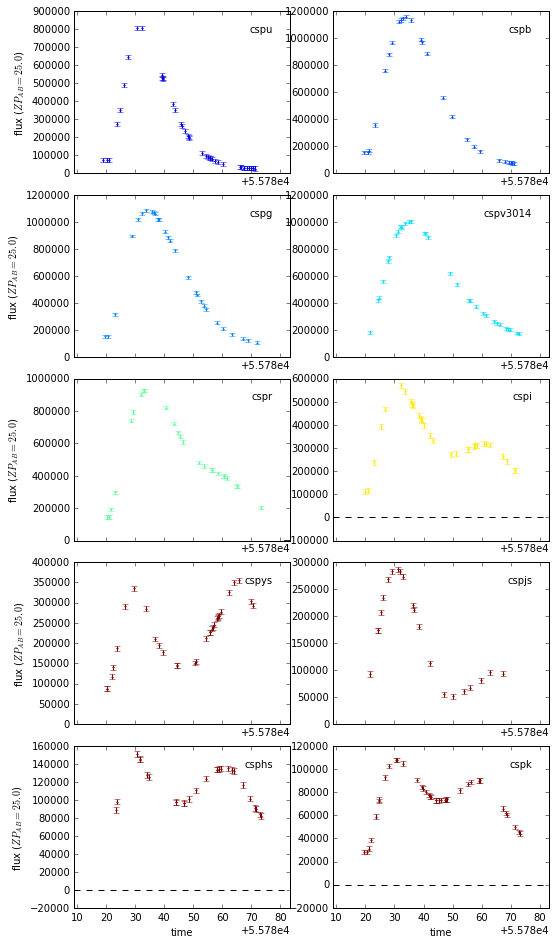

In [78]:
%pylab inline
fig = sncosmo.plot_lc(data=lc)
fig.show()

In [79]:
sncosmo.write_lc(data=lc, fname='sn2011fe.lc', format='ascii')